In [1]:
# import PyBEAM's default module
import pybeam.default as pbd


In [2]:
# define model
model = {'type' : 'ugm', # model type ('base' or 'ugm'). Three model keys needed with value 'ugm'.
        'sigma' : 1.0,   # sets sigma, the scaling parameter
'contamination' : False} # if True, uniform contamination added to model

# outputs which parameters your model uses
pbd.parse_model(model)


['t_nd', 'w', 'mu', 'l', 'k', 'a']

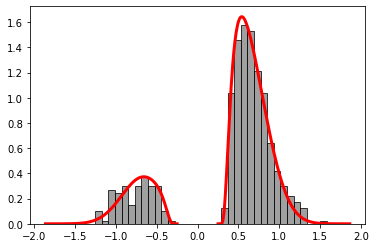

In [3]:
# parameters for synthetic data
phi0 = {'t_nd' : 0.25, # non-decision time
           'w' : 0.5,  # relative start point
          'mu' : 1.0,  # drift rate
           'l' : 3.0,  # leakage rate
           'k' : 2.0,  # urgency ratio
           'a' : 1.0}  # decision threshold location

# generate synthetic data
rt0 = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                          model = model, # dictionary containing model information
                            phi = phi0)  # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi0,  # parameters used for model rt distribution
               rt = rt0);  # dictionary of simulated rt data


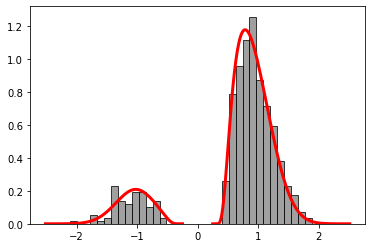

In [4]:
# parameters for synthetic data
phi1 = {'t_nd' : 0.25, # non-decision time
           'w' : 0.5,  # relative start point
          'mu' : 1.0,  # drift rate
           'l' : 3.0,  # leakage rate
           'k' : 2.0,  # urgency ratio
           'a' : 1.5}  # decision threshold location

# generate synthetic data
rt1 = pbd.simulate_model(N_sims = 500,   # number of data points to simulate
                          model = model, # dictionary containing model information
                            phi = phi1)  # parameters used to simulate data

# plot synthetic data and model rt distributions
pbd.plot_rt(model = model, # dictionary containing model information 
              phi = phi1,  # parameters used for model rt distribution
               rt = rt1);  # dictionary of simulated rt data


In [5]:
# define model priors
p = {'pt_nd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
        'pw' : 'Uniform("w", lower = 0.3, upper = 0.7)',     # relative start point prior
       'pmu' : 'Uniform("mu", lower = -5.0, upper = 5.0)',   # drift rate prior
        'pl' : 'Uniform("l", lower = 0.0, upper = 10.0)',    # leakage rate prior
        'pk' : 'Uniform("k", lower = 0.0, upper = 10.0)',    # urgency ratio prior
       'pa0' : 'Uniform("a0", lower = 0.25, upper = 2.5)',   # decision threshold prior 0
       'pa1' : 'Uniform("a1", lower = 0.25, upper = 2.5)'}   # decision threshold prior 1

# define model conditions
c0 = {'rt' : rt0,     # dictionary containing reaction time data
    't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
       'w' : 'pw',    # prior for relative start point, references p['pw']
      'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
       'l' : 'pl',    # prior for the leakage rate, references p['pl']
       'k' : 'pk',    # prior for the urgency ratio, reference p['pk']
       'a' : 'pa0'}   # prior for decision threshold 0, references p['pa0']

c1 = {'rt' : rt1,     # dictionary containing reaction time data
    't_nd' : 'pt_nd', # prior for non-decision time, references p['pt_nd']
       'w' : 'pw',    # prior for relative start point, references p['pw']
      'mu' : 'pmu',   # prior for the drift rate, references p['pmu']
       'l' : 'pl',    # prior for the leakage rate, references p['pl']
       'k' : 'pk',    # prior for the urgency ratio, reference p['pk']
       'a' : 'pa1'}   # prior for decision threshold 0, references p['pa0']

# load conditions into dictionary
cond = {0 : c0, 1 : c1}

# run parameter inference
trace = pbd.inference(model = model, # model dictionary
                     priors = p,     # priors dictionary
                 conditions = cond,  # conditions dictionary
                    samples = 50000, # MCMC samples
                     chains = 3,     # MCMC chains
                      cores = 3,     # number of cpu cores to run chains on
                  file_name = 'ugm') # file name for posteriors


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [a1, a0, k, l, mu, w, t_nd]


Sampling 3 chains for 0 tune and 50_000 draw iterations (0 + 150_000 draws total) took 138 seconds.


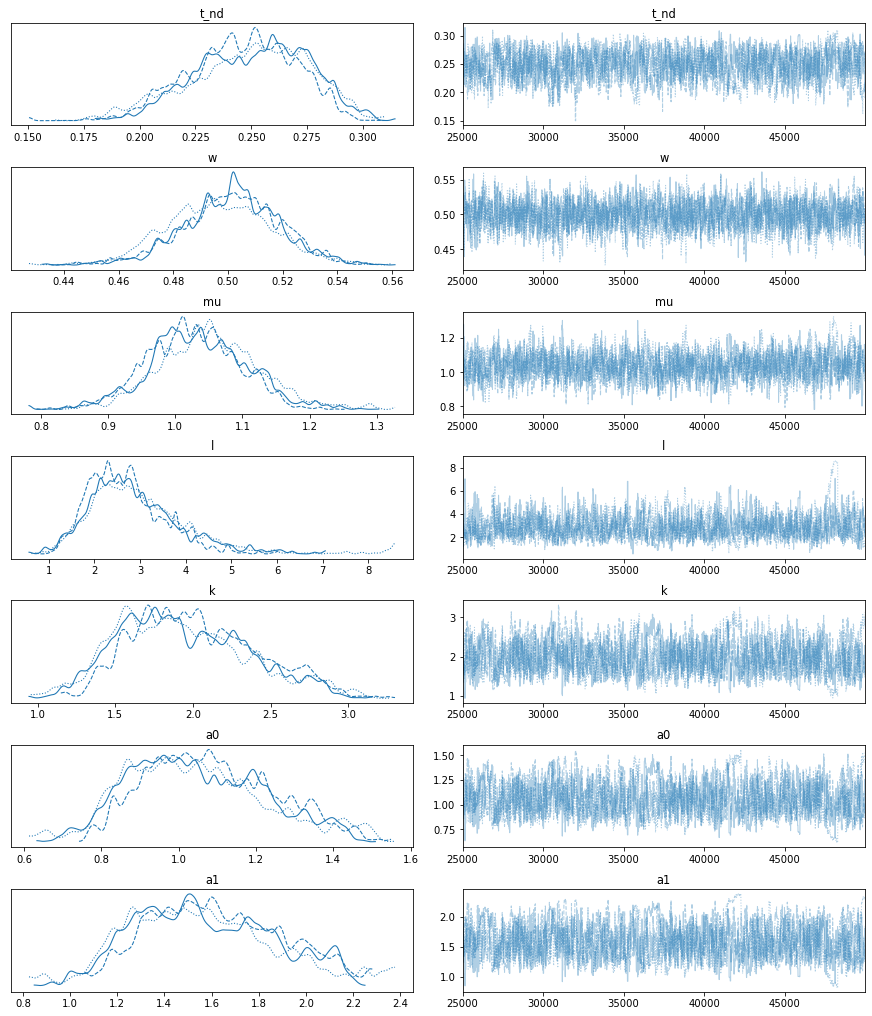

In [3]:
# plot posteriors
pbd.plot_trace(file_name = 'ugm',  # file name to be plotted
                  burnin = 25000); # number of samples to throw out


In [2]:
# summary of posteriors
pbd.summary(file_name = 'ugm', # file name to be plotted
               burnin = 25000) # number of samples to throw out


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.249,0.025,0.201,0.291,0.001,0.001,378.0,688.0,1.01
w,0.500,0.018,0.467,0.536,0.000,0.000,1383.0,1956.0,1.01
mu,1.037,0.073,0.901,1.173,0.004,0.003,445.0,737.0,1.02
l,2.862,1.024,1.236,4.677,0.061,0.048,336.0,475.0,1.01
k,1.966,0.413,1.303,2.795,0.025,0.018,276.0,291.0,1.01
a0,1.059,0.176,0.774,1.410,0.011,0.008,258.0,215.0,1.01
a1,1.586,0.300,1.103,2.165,0.019,0.014,247.0,191.0,1.01
